In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model 
import matplotlib.pyplot as plt
import os

In [2]:
filePath = 'bikes.csv'
bikesData = pd.read_csv(filePath)

In [3]:
bikesData['dteday']

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

In [4]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
bikesData['yr'].unique()

array([0, 1])

In [7]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
columnsToDrop = ['instant', 'casual', 'registered', 'atemp', 'dteday']

In [9]:
bikesData = bikesData.drop(columnsToDrop, axis =1)

In [10]:
from sklearn.model_selection import train_test_split
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24
train_set, test_set = train_test_split(bikesData, test_size = 0.3, random_state=42)
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

<ipython-input-10-8ad1e00975fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.sort_values('dayCount', axis= 0, inplace=True)
<ipython-input-10-8ad1e00975fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.sort_values('dayCount', axis= 0, inplace=True)


In [11]:
train_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
6,1,0,1,6,0,6,0,1,0.22,0.80,0.0000,2,0.250000
7,1,0,1,7,0,6,0,1,0.20,0.86,0.0000,3,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1,1,12,17,0,1,1,2,0.26,0.48,0.0896,164,723.833333
17373,1,1,12,18,0,1,1,2,0.26,0.48,0.1343,122,723.875000
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000


In [12]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
5,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,1,0.208333
8,1,0,1,8,0,6,0,1,0.24,0.75,0.0000,8,0.333333
14,1,0,1,14,0,6,0,2,0.46,0.72,0.2836,106,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,0.20,0.51,0.2239,49,723.083333
17355,1,1,12,0,0,1,1,1,0.18,0.55,0.1940,34,723.125000
17367,1,1,12,12,0,1,1,2,0.24,0.56,0.1940,224,723.625000
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333


In [13]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [14]:
columnsToScale = ['temp', 'hum', 'windspeed']

In [15]:
scaler = StandardScaler()
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

<ipython-input-15-25ad84e51170>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])
/home/anantha_nryn/miniconda3/envs/mlenv/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-15-25ad84e51170>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [16]:
display_scores(train_set)

Scores:        season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
1           1   0     1   1        0        6           0           1   
2           1   0     1   2        0        6           0           1   
4           1   0     1   4        0        6           0           1   
6           1   0     1   6        0        6           0           1   
7           1   0     1   7        0        6           0           1   
...       ...  ..   ...  ..      ...      ...         ...         ...   
17372       1   1    12  17        0        1           1           2   
17373       1   1    12  18        0        1           1           2   
17374       1   1    12  19        0        1           1           2   
17376       1   1    12  21        0        1           1           1   
17378       1   1    12  23        0        1           1           1   

           temp       hum  windspeed  cnt    dayCount  
1     -1.440143  0.892500  -1.552670   40    0.041667  
2  

In [17]:
display_scores(test_set)

Scores:        season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0           1   0     1   0        0        6           0           1   
3           1   0     1   3        0        6           0           1   
5           1   0     1   5        0        6           0           2   
8           1   0     1   8        0        6           0           1   
14          1   0     1  14        0        6           0           2   
...       ...  ..   ...  ..      ...      ...         ...         ...   
17354       1   1    12  23        0        0           0           1   
17355       1   1    12   0        0        1           1           1   
17367       1   1    12  12        0        1           1           2   
17375       1   1    12  20        0        1           1           2   
17377       1   1    12  22        0        1           1           1   

           temp       hum  windspeed  cnt    dayCount  
0     -1.336557  0.944231  -1.552670   16    0.000000  
3  

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [19]:
trainingCols = train_set.drop('cnt', axis = 1)

In [20]:
trainingLabels = train_set['cnt']

In [21]:
dec_reg = DecisionTreeRegressor(random_state=42)

In [22]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv = 10)
display_scores(dt_mae_scores)
dt_mse_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_root_mean_squared_error", cv = 10)
display_scores(dt_mse_scores)

Scores: [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
Mean: 54.7898409457034
Standard deviation: 16.563759407187572
Scores: [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
Mean: 88.0801278896052
Standard deviation: 24.927341207369675


In [23]:
lin_reg = LinearRegression()

In [24]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv = 10)
lr_mse_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_root_mean_squared_error", cv = 10)
display_scores(lr_mae_scores)
display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942358
Standard deviation: 31.426965705295473
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181816
Standard deviation: 37.55565075919491


In [25]:
forest_reg = RandomForestRegressor(random_state=42,n_estimators=150)

In [26]:
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv = 10)
rf_mse_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_root_mean_squared_error", cv = 10)
display_scores(rf_mae_scores)
display_scores(rf_mse_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963
Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'n_estimators': [120, 150], 
        'max_features': [10, 12], 
        'max_depth': [15, 28]
    }
]

In [28]:
grid_search = GridSearchCV(forest_reg,param_grid, cv = 5, scoring = "neg_mean_squared_error")

In [29]:
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

RandomForestRegressor(max_depth=28, max_features=10, n_estimators=150,
                      random_state=42)
{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}


In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [39]:
final_model = grid_search.best_estimator_

In [32]:
test_set.sort_values('dayCount', axis=0, inplace = True)
test_x_cols = (test_set.drop(['cnt'],axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

<ipython-input-32-dd6c0f97d6dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.sort_values('dayCount', axis=0, inplace = True)


In [33]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/home/anantha_nryn/miniconda3/envs/mlenv/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/anantha_nryn/miniconda3/envs/mlenv/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [34]:
mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)
print(final_mse)

39.47930005837265


In [35]:
test_set

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
0,1,0,1,0,0,6,0,1,-1.336557,0.944231,-1.552670,16,0.000000,35.973333
3,1,0,1,3,0,6,0,1,-1.336557,0.633846,-1.552670,13,0.125000,10.873333
5,1,0,1,5,0,6,0,2,-1.336557,0.633846,-0.818365,1,0.208333,4.680000
8,1,0,1,8,0,6,0,1,-1.336557,0.633846,-1.552670,8,0.333333,21.013333
14,1,0,1,14,0,6,0,2,-0.197115,0.478654,0.771536,106,0.583333,120.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17354,1,1,12,23,0,0,0,1,-1.543729,-0.607694,0.282273,49,723.083333,39.900000
17355,1,1,12,0,0,1,1,1,-1.647314,-0.400770,0.037231,34,723.125000,40.466667
17367,1,1,12,12,0,1,1,2,-1.336557,-0.349039,0.037231,224,723.625000,172.146667
17375,1,1,12,20,0,1,1,2,-1.232972,-0.142116,-0.206991,89,723.958333,96.440000


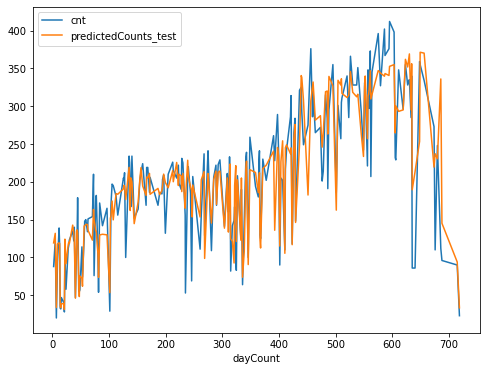

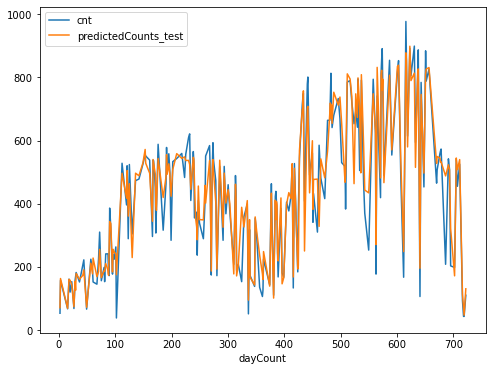

In [38]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()